## US Traffic Accident Project Overview
Traffic accidents are some of the most widely occurring events that happen everywhere across the globe. They take place every single day, and can happen at any time. Traffic accidents have huge impacts on our population as they can lead to injuries, death, as well as economic loss.
However, for the most part because these events are just a normal daily occurrence, people don’t pay too much attention. Only something like a plane crash may get thorough coverage and analysis. When traffic accidents occur, there usually is not much coverage or in depth research on factors that may play a role, or the detection of any patterns and common themes in regards to traffic accidents. Understanding what factors could potentially contribute to traffic accidents can hopefully help to improve traffic safety and create effective preventative policies or plans. My project delves into a comprehensive U.S. traffic accident dataset, revealing insights about accidents, severity, and contributing factors across different locations and time periods. By comparing this data over time and relative to different conditions, I aim to reveal patterns or correlations in the data, to hopefully understand the trends and underlying causes of traffic accidents.

My main focus for this projects can be seen through my primary research questions: 

1) What is the relationship between weather, location, or time of day on severity or number of accidents? Are there any common themes?

2) How have traffic accidents changed over time, and did events such as Covid-19 have any effect on traffic accidents or severity?

Factors such as weather conditions can have a significant impact on traffic accidents or the severity of such accidents. In looking at the different weather conditions in relation to the severity level of accidents, I aim to identify if there are weather situations that pose more threats to drivers. Looking at if there are any common themes in accidents compared with other locations can help to see if certain places are more prone to accidents than others and overall help in the potential discovery of why. I also think it is important to analyze the progression of these traffic accidents over time to see any broad trends, and whether the start of the Covid-19 pandemic had any effect or led to any unprecedented patterns in traffic accidents.


## Methods

My dataset is from Kaggle regarding US traffic accidents from 2016-2023 that has data obtained from various places like US and State departments of transportation, and law enforcement agencies. I condensed the original dataset down from 500k entries to around 1500 entries as the file was too large for efficient analysis and visualization. This dataset provides a detailed account of traffic accidents in the United States from February 2016 to March 2023, covering 49 states, and includes key factors like the date, time, city, state, county, weather conditions, severity, etc. of each accident. There is also a description of each accident that can offer a qualitative aspect to this project. 

When conducting data analysis I made sure the columns were in the correct date time format so the data could easily be extracted for visualizations requiring time related features or progressions. I also made sure to handle missing values and filter them out when performing my analysis. I used different libraries for analysis, including Pandas, Matplotlib for plotting the visualizations, and the Natural Language Toolkit (nltk) for text analysis, and wordcloud.

Source of Dataset:[Traffic Accident Data](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)


In [114]:
import pandas as pd
import matplotlib.pyplot as plt



In [115]:
traffic_df = pd.read_csv('https://raw.githubusercontent.com/sachigill/dhfinalproject/main/traffic_accident_data.csv')

In [116]:
pd.set_option('display.max_columns', None)
print(traffic_df.head())



traffic_df['Wind_Speed(mph)'] = pd.to_numeric(traffic_df['Wind_Speed(mph)'], errors='coerce')
traffic_df['Precipitation(in)'] = pd.to_numeric(traffic_df['Precipitation(in)'], errors='coerce')
traffic_df['Temperature(F)'] = pd.to_numeric(traffic_df['Temperature(F)'], errors='coerce')
traffic_df['Humidity(%)'] = pd.to_numeric(traffic_df['Humidity(%)'], errors='coerce')
traffic_df['Visibility(mi)'] = pd.to_numeric(traffic_df['Visibility(mi)'], errors='coerce')
descriptive_stats = traffic_df[['Severity', 'Wind_Speed(mph)', 'Precipitation(in)', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)']].describe()

descriptive_stats

          ID   Source  Severity           Start_Time             End_Time  \
0  A-2047758  Source2         2  2019-06-12 10:10:56  2019-06-12 10:55:58   
1  A-4694324  Source1         2  2022-12-03 23:37:14   2022-12-04 1:56:53   
2  A-5006183  Source1         2  2022-08-20 13:13:00  2022-08-20 15:22:45   
3  A-4237356  Source1         2  2022-02-21 17:43:04  2022-02-21 19:43:23   
4  A-6690583  Source1         2   2020-12-04 1:46:00   2020-12-04 4:13:09   

   Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0  30.641211  -91.153481        NaN         NaN         0.000   
1  38.990562  -77.399070  38.990037  -77.398282         0.056   
2  34.661189 -120.492822  34.661189 -120.492442         0.022   
3  43.680592  -92.993317  43.680574  -92.972223         1.054   
4  35.395484 -118.985176  35.395476 -118.985995         0.046   

                                         Description           Street  \
0  Accident on LA-19 Baker-Zachary Hwy at Lower Z...       Highway 19   


,Severity,Wind_Speed(mph),Precipitation(in),Temperature(F),Humidity(%),Visibility(mi)
count,1499.000000,1391.000000,1027.000000,1474.000000,1471.000000,1468.000000
mean,2.210140,7.721783,0.007653,62.030122,65.186268,9.134475
std,0.485302,5.341519,0.058991,18.640740,22.755323,2.500550
min,1.000000,0.000000,0.000000,-35.000000,6.000000,0.000000
25%,2.000000,4.600000,0.000000,50.000000,48.000000,10.000000
50%,2.000000,7.000000,0.000000,64.000000,67.000000,10.000000
75%,2.000000,10.400000,0.000000,76.000000,85.000000,10.000000
max,4.000000,32.200000,1.360000,111.000000,100.000000,45.000000


In [117]:
weather_condition = traffic_df['Weather_Condition'].dropna().unique()
print("Weather Conditions:", weather_condition)


print("Number of Unique Weather Conditions:", len(weather_condition))

Weather Conditions: ['Fair' 'Wintry Mix' 'Light Rain' 'Cloudy' 'Mostly Cloudy' 'Partly Cloudy'
 'Clear' 'Scattered Clouds' 'Fog' 'Overcast' 'Light Snow' 'T-Storm'
 'Thunderstorms and Rain' 'Thunder' 'Light Rain with Thunder' 'Rain'
 'Showers in the Vicinity' 'Mostly Cloudy / Windy' 'Heavy Rain'
 'Cloudy / Windy' 'Light Drizzle' 'Heavy T-Storm' 'Light Rain / Windy'
 'Smoke' 'Haze' 'Blowing Dust / Windy' 'N/A Precipitation'
 'Thunder in the Vicinity' 'Snow' 'Heavy Thunderstorms and Rain'
 'Shallow Fog' 'Light Freezing Drizzle' 'Fair / Windy' 'Patches of Fog'
 'Light Snow / Windy' 'Blowing Snow / Windy' 'Thunderstorm' 'Drizzle'
 'T-Storm / Windy' 'Partly Cloudy / Windy']
Number of Unique Weather Conditions: 40


Here I showcase some basic information about my dataset including outputting the first few rows of the dataset to give a general overview, and also some disruptive summary statistics like count, mean , min, max, etc. that include some factors I explored in the project. Then I also printed out all the different weather conditions and how many there were for clarity purposes.


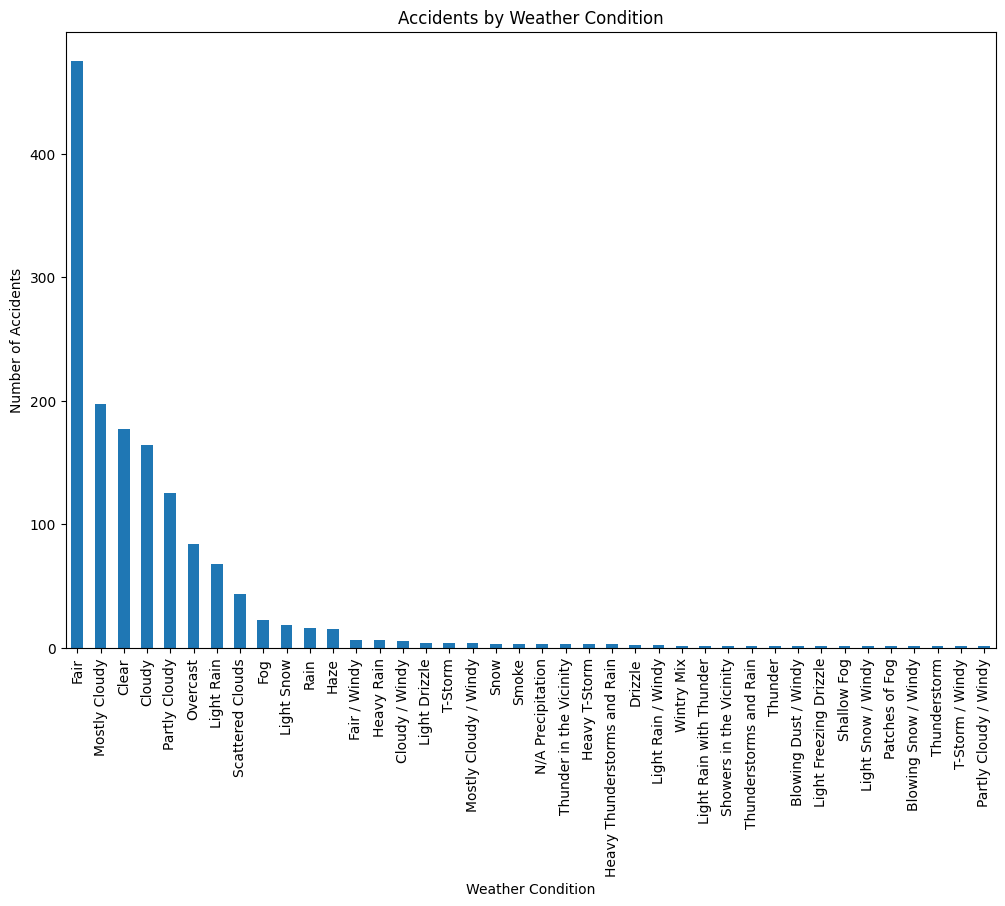

In [118]:
plt.figure(figsize=(12, 8))
traffic_df['Weather_Condition'].value_counts().plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Condition')
plt.show()

Here in this visualization I analyzed accidents by weather condition, where it shows that the largest number of accidents seems to happen in fair weather, with mostly cloudy, clear, cloudy, partly cloudy, and overcast trailing behind that.
This could be due to the fact that fair or cloudy weather is typically common so more accidents happen due to the sheer amount that this weather is present in daily life.


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


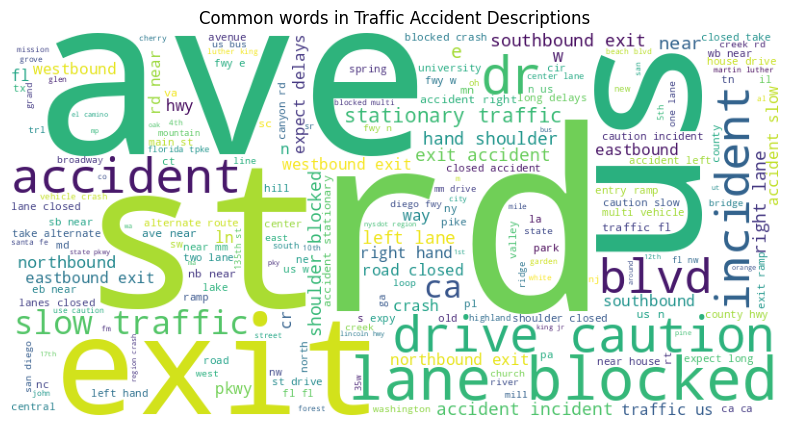

In [119]:
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

my_stop_words = {'due', 'accident', 'ca'}
stop_words.update(my_stop_words)

traffic_df['Description'] = traffic_df['Description'].astype(str)

def text_process(description, stop_words):
  description = description.lower()
  words = description.split()
 # removing the stop words
  words_no_stop = [w for w in words if w not in stop_words]
    # joining the words back into a string
  return ' '.join(words_no_stop)

traffic_df['description_final'] = traffic_df['Description'].apply(lambda x: text_process(x, stop_words))
all_descriptions = ' '.join(traffic_df['description_final'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common words in Traffic Accident Descriptions')
plt.show()

My next analysis was looking at the words from the Description section in the dataset of each accident and producing WordCloud visualizations of the most common words seen in all these accidents as well as in different countries like LA, SF, and New York County. The words that stand out to me in the overall WordCloud are “exit”, “ave”, and “lane blocked”. 


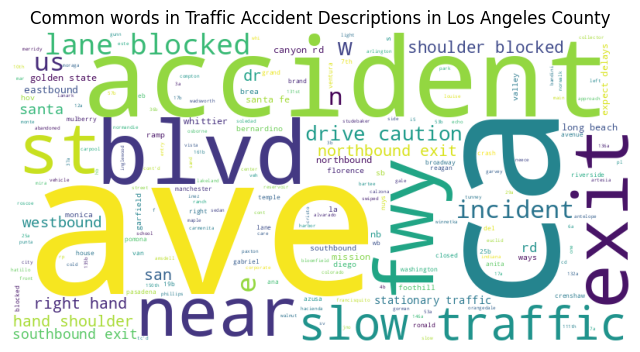

In [120]:
traffic_df['description_final'] = traffic_df['Description'].apply(lambda x: text_process(x, stop_words))

county = 'Los Angeles'
traffic_df_location = traffic_df[traffic_df['County'] == county]


all_descriptions_location = ' '.join(traffic_df_location['description_final'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions_location)


plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Common words in Traffic Accident Descriptions in Los Angeles County')
plt.show()


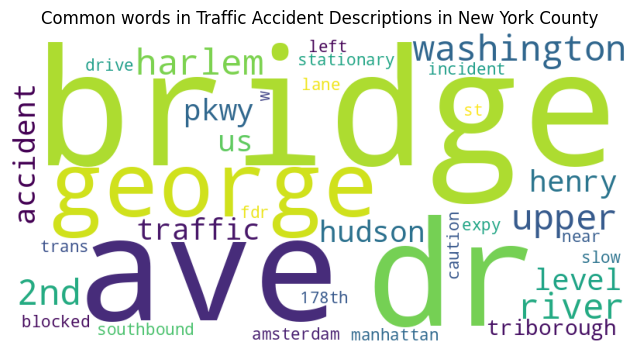

In [121]:
county = 'New York'
traffic_df_location = traffic_df[traffic_df['County'] == county]


traffic_df['description_final'] = traffic_df['Description'].apply(lambda x: text_process(x, stop_words))



all_descriptions_location = ' '.join(traffic_df_location['description_final'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions_location)


plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Common words in Traffic Accident Descriptions in New York County')
plt.show()


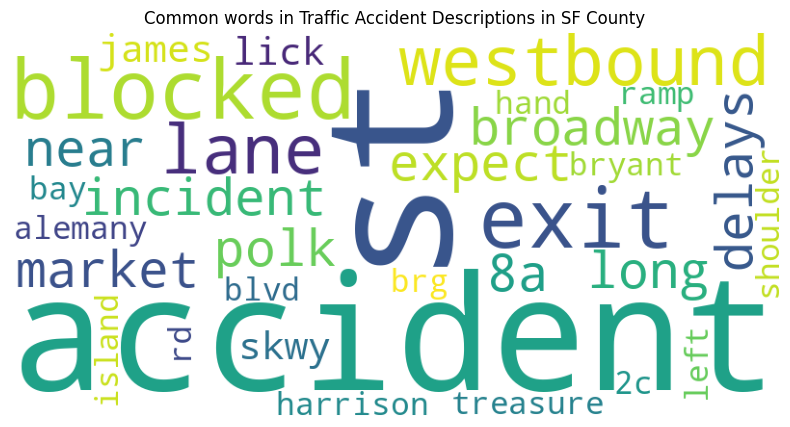

In [122]:
county = 'San Francisco'
traffic_df_location = traffic_df[traffic_df['County'] == county]


traffic_df['description_final'] = traffic_df['Description'].apply(lambda x: text_process(x, stop_words))



all_descriptions_location = ' '.join(traffic_df_location['description_final'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions_location)


plt.figure(figsize=(18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Common words in Traffic Accident Descriptions in SF County')
plt.show()

In regards to LA County, common words include “blvd”, “exit”, “fwy”, “slow traffic” and “ave”. For New York I notice the standout words are “bridge”, “hudson”, “river”, and “harlem”. Looking at SF County words such as “westbound”, “market”, “polk”, and “blocked” stand out. I notice exit seems to be more popular in regards to LA which can indicate the urban structure of the city itself plays a role in where these accidents happen. The LA area is more car centric compared to more urban and condensed areas like New York and SF so making it reasonable that words like freeway or exit are more apparent in their accident descriptions.



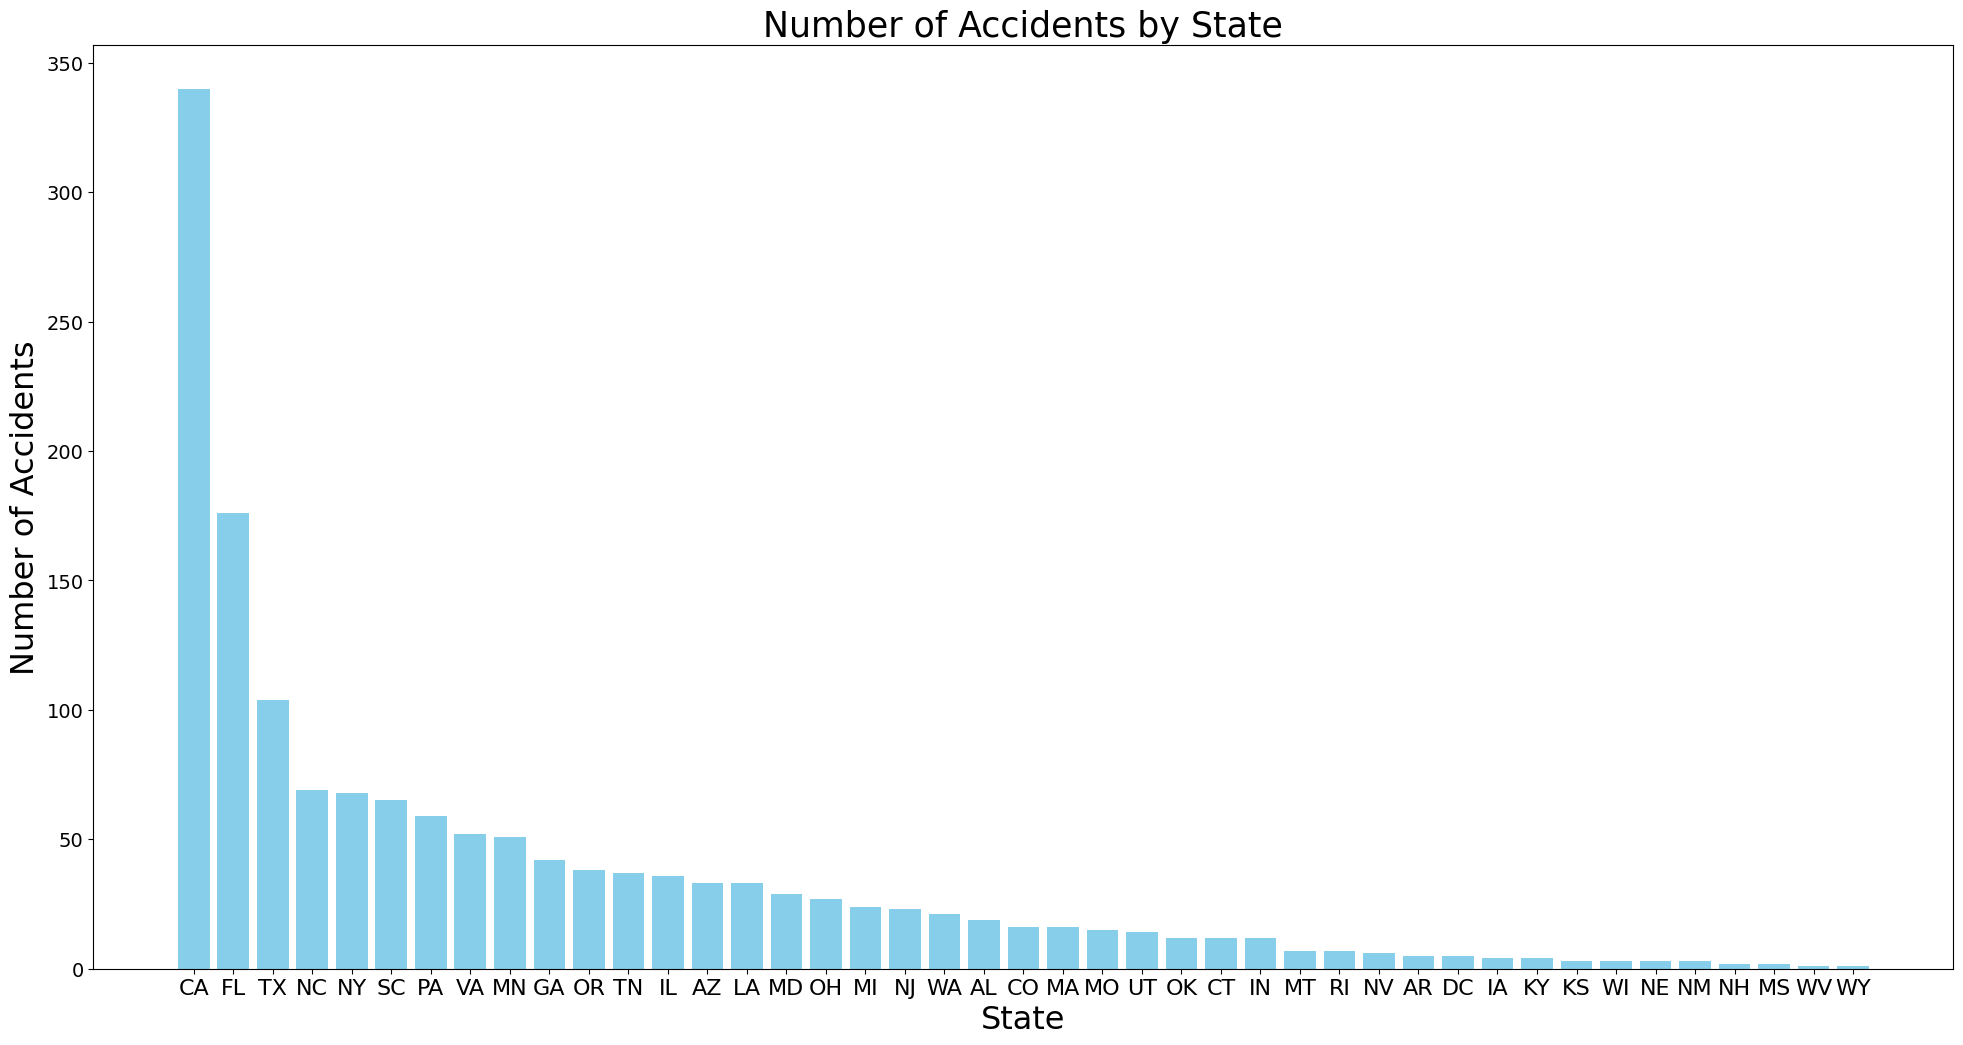

In [123]:
accident_per_state = traffic_df.groupby('State').size().reset_index(name='Number_of_Accidents')


accident_per_state = accident_per_state.sort_values('Number_of_Accidents', ascending=False)


plt.figure(figsize=(24, 12))
plt.bar(accident_per_state['State'], accident_per_state['Number_of_Accidents'], color='skyblue')
plt.xlabel('State', fontsize=23)
plt.ylabel('Number of Accidents', fontsize=23)
plt.title('Number of Accidents by State', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.show()

In regards to the number of accidents by state, California, Florida, and Texas take the spots, however these are also the states with the highest population numbers so it's difficult to make assumptions based on this as this is most likely due to the sheer number of people that live in these states.


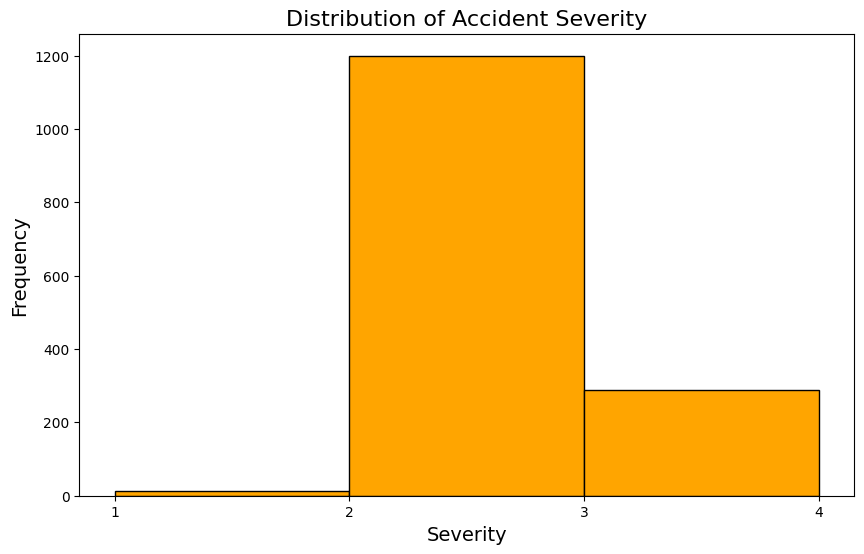

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(traffic_df['Severity'], bins=range(1, 5), edgecolor='black', color='orange')
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Accident Severity', fontsize=16)
plt.xticks(range(1, 5))
plt.show()

While exploring the data I also wanted to see what the distribution was of accident severity; the range of accident severity goes from 1-4, with 1 being the least severe and 4 being the most severe, and it seems most accidents fell under the 2-3 range.

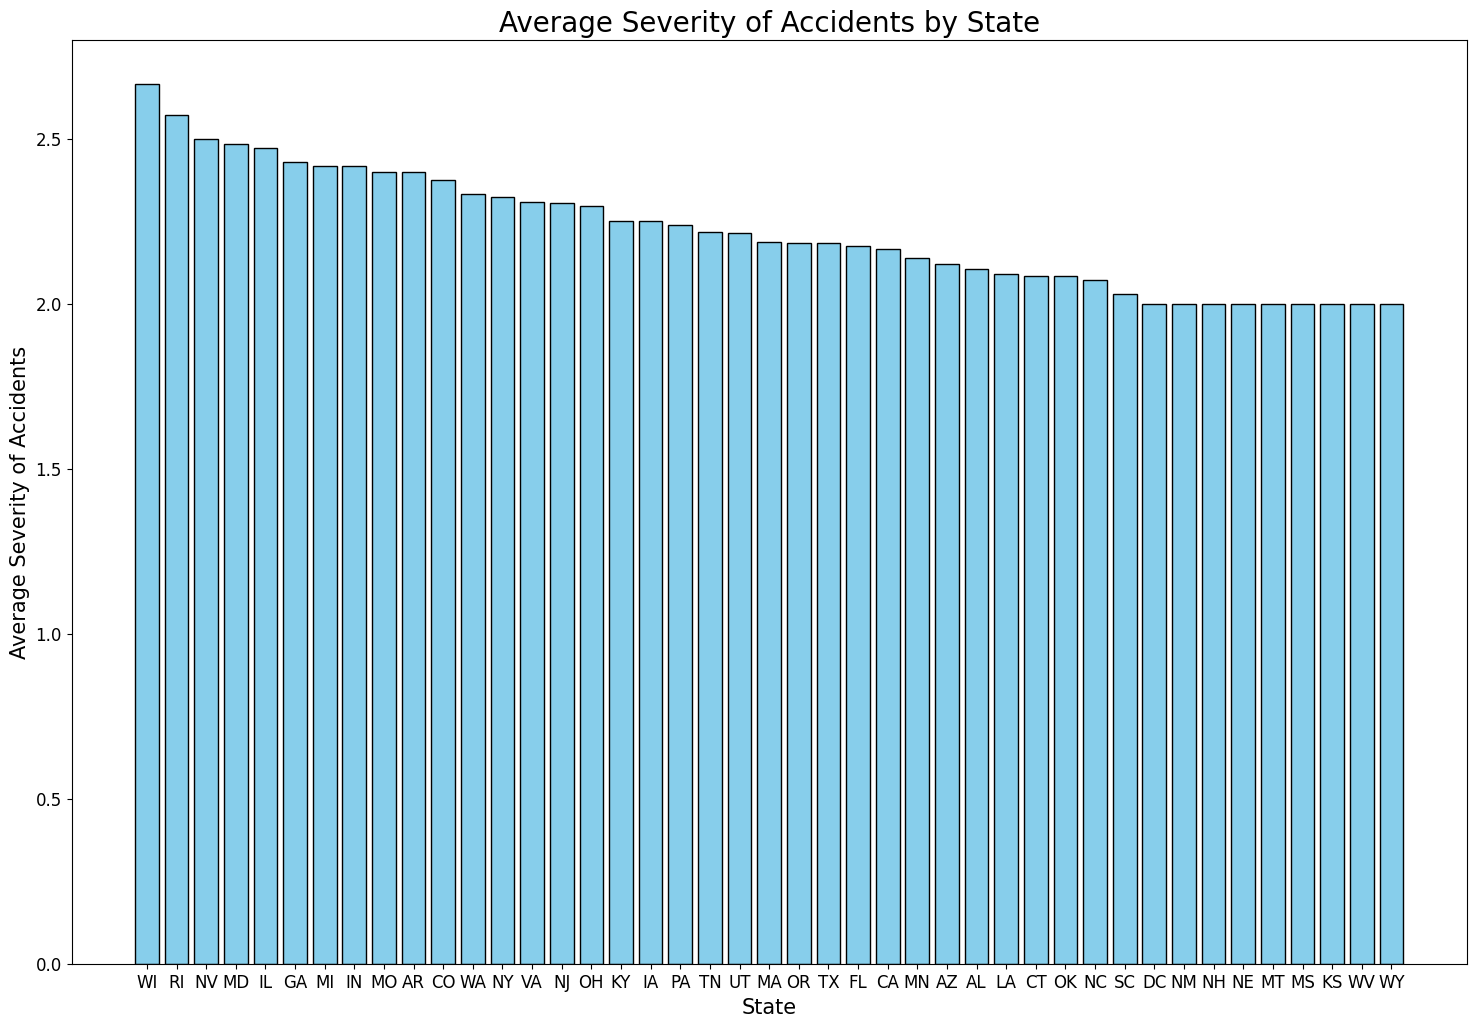

In [125]:
severity_by_state = traffic_df.groupby('State')['Severity'].mean().reset_index()

#sorting by severity
severity_by_state = severity_by_state.sort_values(by='Severity', ascending=False)


plt.figure(figsize=(18, 12))
plt.bar(severity_by_state['State'], severity_by_state['Severity'], color='skyblue', edgecolor='black')
plt.xlabel('State', fontsize=15)
plt.ylabel('Average Severity of Accidents', fontsize=15)
plt.title('Average Severity of Accidents by State', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

When viewing average severity by state, the top spots were surprisingly different from the number of accidents by state; in this case Wisconsin, Rhode Island, Nevada, and Maryland, Illinois, Georgia, and Mississippi have the highest average severity. This could be due to the fact these states are less populated and may not have as good road infrastructure compared to other states. After some research I found that Misisisipi is also known to have some of the poorest lighting in the country and high rates of drunk driving which could also contribute to the severity of these accidents.

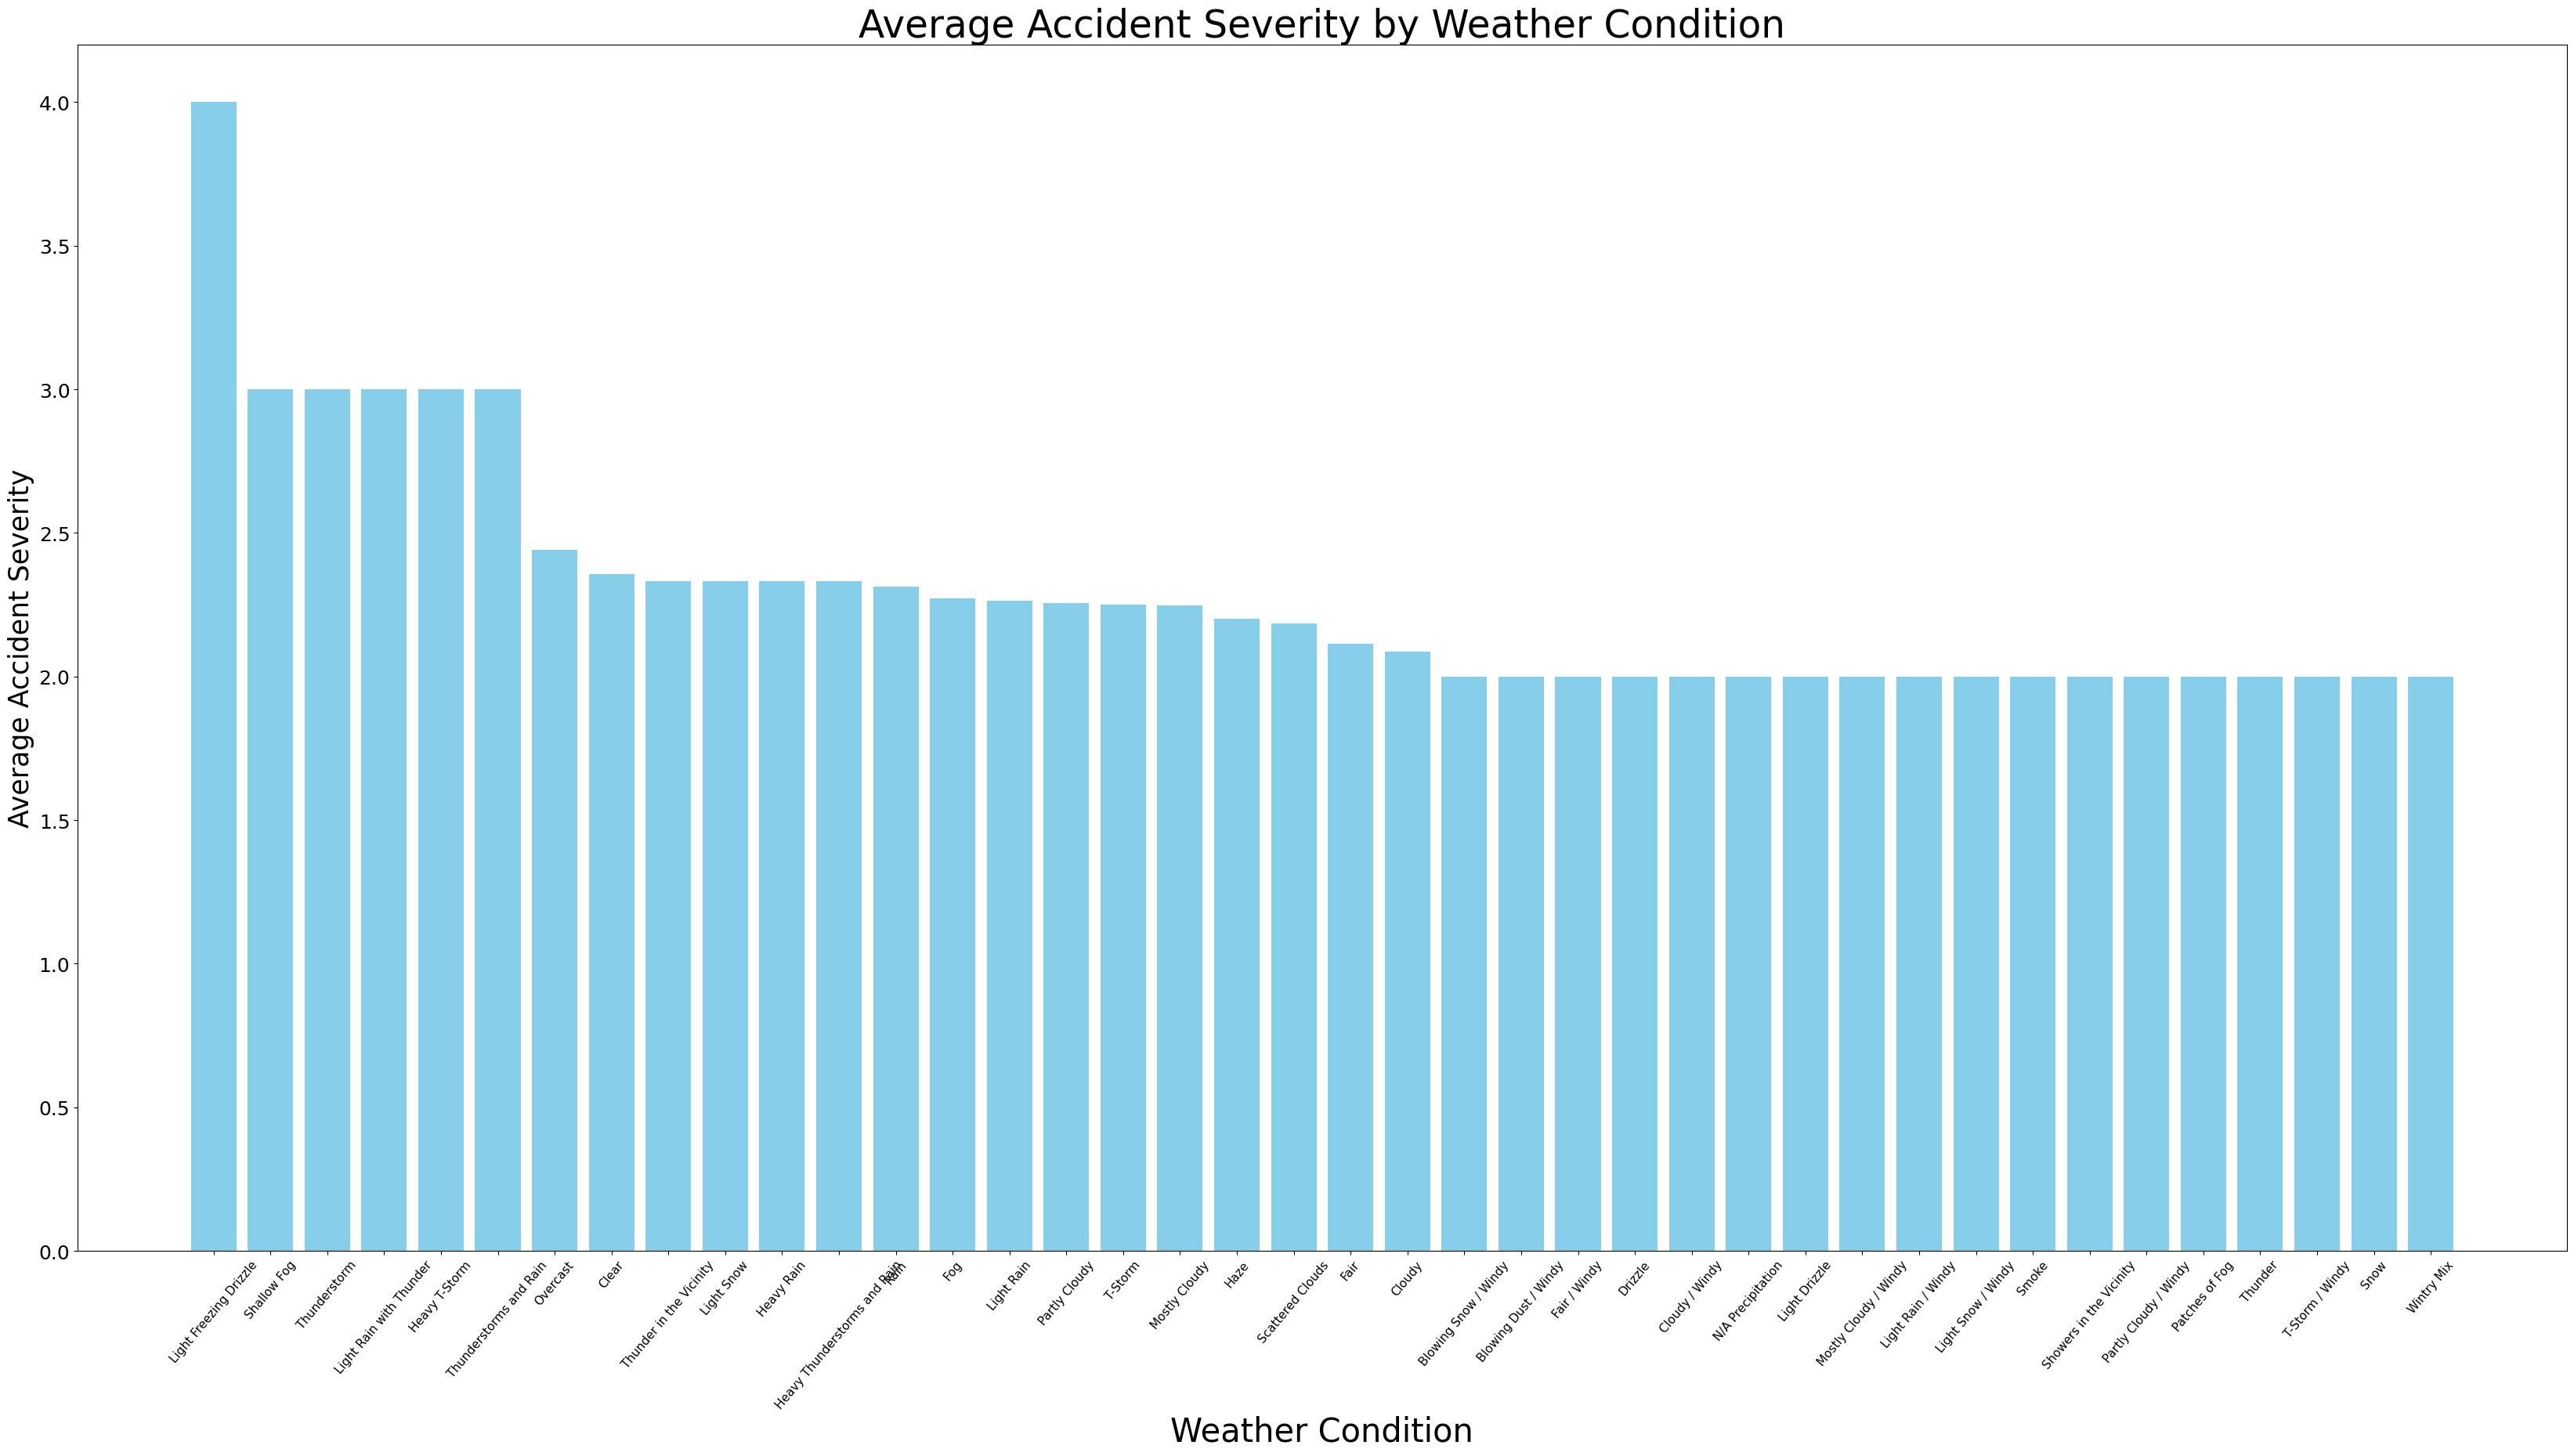

In [126]:
avg_severity_by_weather = traffic_df.groupby('Weather_Condition')['Severity'].mean().reset_index()
avg_severity_by_weather = avg_severity_by_weather.sort_values(by='Severity', ascending=False)


plt.figure(figsize=(41, 20))
plt.bar(avg_severity_by_weather['Weather_Condition'], avg_severity_by_weather['Severity'], color='skyblue')
plt.xlabel('Weather Condition', fontsize = 30)
plt.ylabel('Average Accident Severity', fontsize=25)
plt.title('Average Accident Severity by Weather Condition', fontsize=35)
plt.xticks(rotation=50, fontsize=11)
plt.yticks(fontsize=18)
plt.show()

In terms of weather conditions by severity of accident, light freezing drizzle, shallow fog, and thunderstorm, light rain with thunder correlate with the highest average severity of accidents. This indicates that even though more accidents might happen in fair weather, the severity of the accident has a connection to harsher weather.


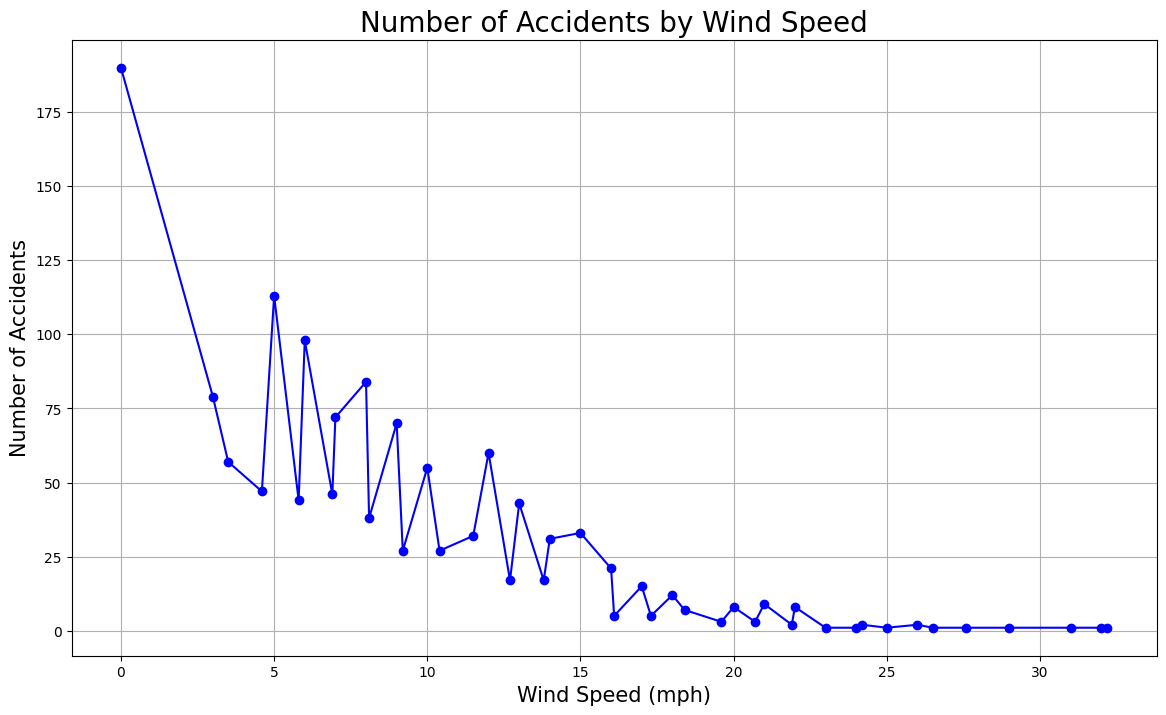

In [127]:
traffic_df['Wind_Speed(mph)'] = pd.to_numeric(traffic_df['Wind_Speed(mph)'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Wind_Speed(mph)'])

windspeed = traffic_df.groupby('Wind_Speed(mph)').size().reset_index(name='Number_of_Accidents')

plt.figure(figsize=(14, 8))
plt.plot(windspeed['Wind_Speed(mph)'], windspeed['Number_of_Accidents'], marker='o', linestyle='-', color='blue')
plt.xlabel('Wind Speed (mph)', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
plt.title('Number of Accidents by Wind Speed', fontsize=20)
plt.grid(True)
plt.show()

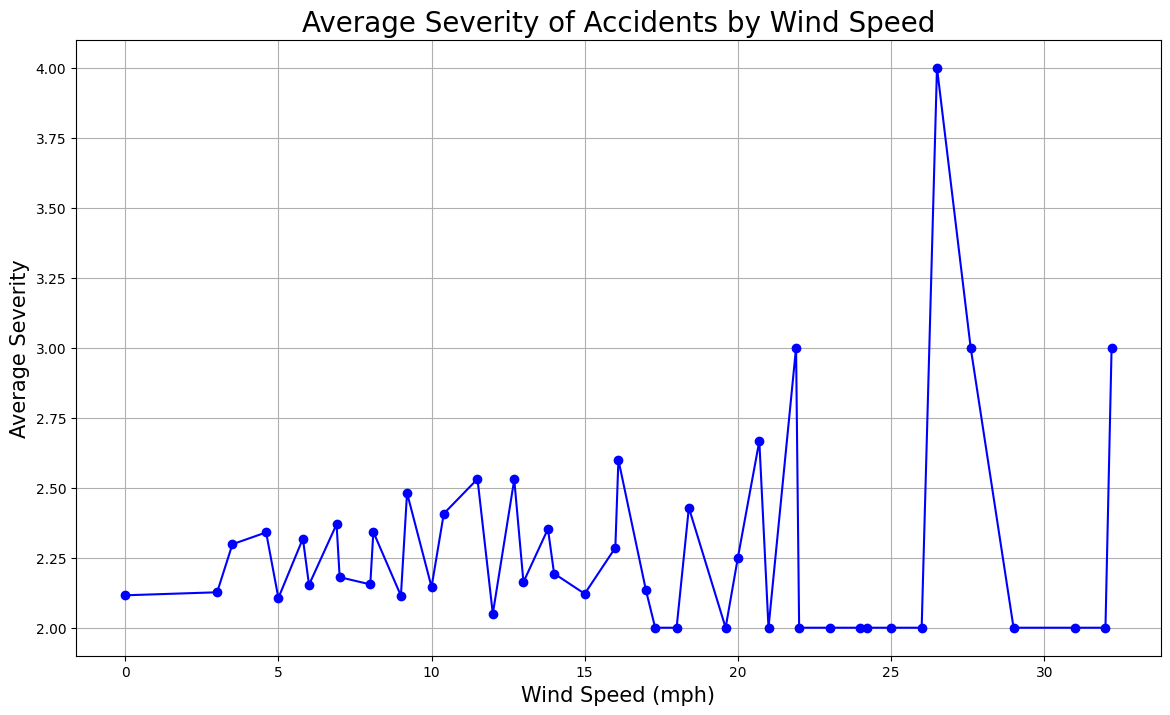

In [128]:
traffic_df['Severity'] = pd.to_numeric(traffic_df['Severity'], errors='coerce')
traffic_df['Wind_Speed(mph)'] = pd.to_numeric(traffic_df['Wind_Speed(mph)'], errors='coerce')

traffic_df = traffic_df.dropna(subset=['Severity', 'Wind_Speed(mph)'])

#grouping by wind speed and figuring out the avg severity
severity_by_wind_speed = traffic_df.groupby('Wind_Speed(mph)')['Severity'].mean().reset_index()


plt.figure(figsize=(14, 8))
plt.plot(severity_by_wind_speed['Wind_Speed(mph)'], severity_by_wind_speed['Severity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Wind Speed (mph)', fontsize=15)
plt.ylabel('Average Severity', fontsize=15)
plt.title('Average Severity of Accidents by Wind Speed', fontsize=20)
plt.grid(True)
plt.show()

I then wanted to analyze the number of accidents based on other weather factors like wind speed. Based on the plot, the higher the wind speed the less accidents that seem to occur, however this is fitting with the previous data that shows most accidents occur in fair weather so it makes sense there are less accidents with higher wind speeds. 
However when looking at average severity of accidents by wind speed there is more of a pattern showing higher severity is correlated with higher wind speed. Although there are many accidents with high wind speeds and not high severity, the only points of high severity such as 3 and over, are all correlated with higher wind speeds around over 20 mph. 


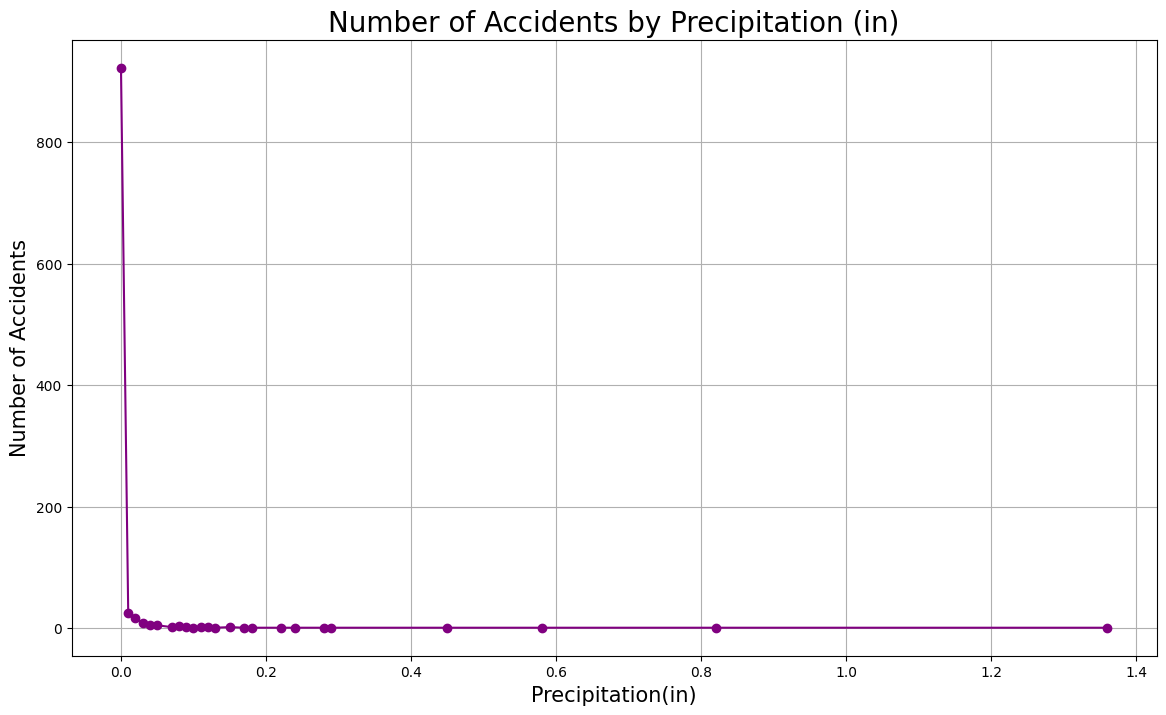

In [129]:
traffic_df['Precipitation(in)'] = pd.to_numeric(traffic_df['Precipitation(in)'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Precipitation(in)'])


prec_accidents = traffic_df.groupby('Precipitation(in)').size().reset_index(name='Number_of_Accidents')


plt.figure(figsize=(14, 8))
plt.plot(prec_accidents['Precipitation(in)'], prec_accidents['Number_of_Accidents'], marker='o', linestyle='-', color='purple')
plt.xlabel('Precipitation(in)', fontsize=15)
plt.ylabel('Number of Accidents', fontsize=15)
plt.title('Number of Accidents by Precipitation (in)', fontsize=20)
plt.grid(True)
plt.show()

When looking at the number of accidents by precipitation, it seems like most accidents are occuring when there is no rain, which again fits with the previous analysis. In most places it doesn’t usually rain all the time, so based on the regularity of fair weather, it makes sense most of these accidents are occurring with no precipitation. It also indicates that weather may not be a significant factor on the rate of accidents but other things like human factors or error.


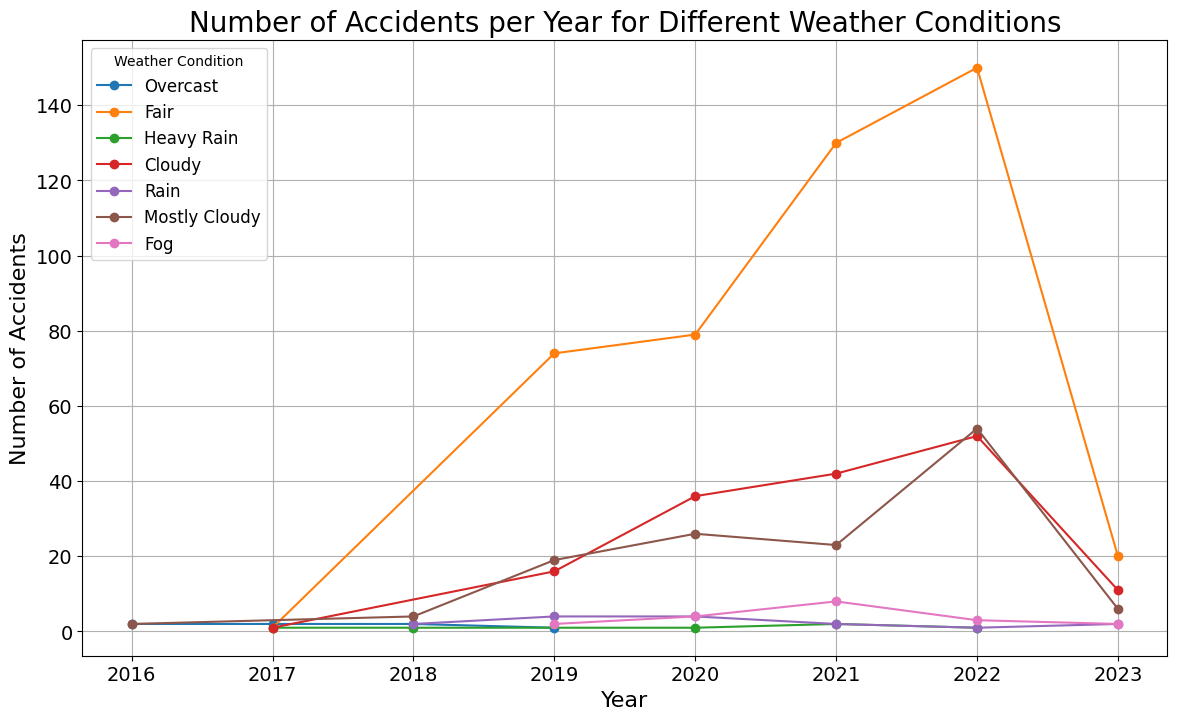

In [130]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Start_Time'])

traffic_df['Year'] = traffic_df['Start_Time'].dt.year

weather_conditions = ['Overcast', 'Fair', 'Heavy Rain', 'Cloudy', 'Rain', 'Mostly Cloudy', 'Fog']
#make a dictionary
weather_data = {}

for condition in weather_conditions:
    cond_df = traffic_df[traffic_df['Weather_Condition'] == condition]
    condition_per_year = cond_df.groupby('Year').size().reset_index(name='Number_of_Accidents')
    weather_data[condition] = condition_per_year


plt.figure(figsize=(14, 8))

for condition, data in weather_data.items():
    plt.plot(data['Year'], data['Number_of_Accidents'], marker='o', linestyle='-', label=condition)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents per Year for Different Weather Conditions', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True) 
plt.legend(title='Weather Condition', fontsize=12)
plt.show()

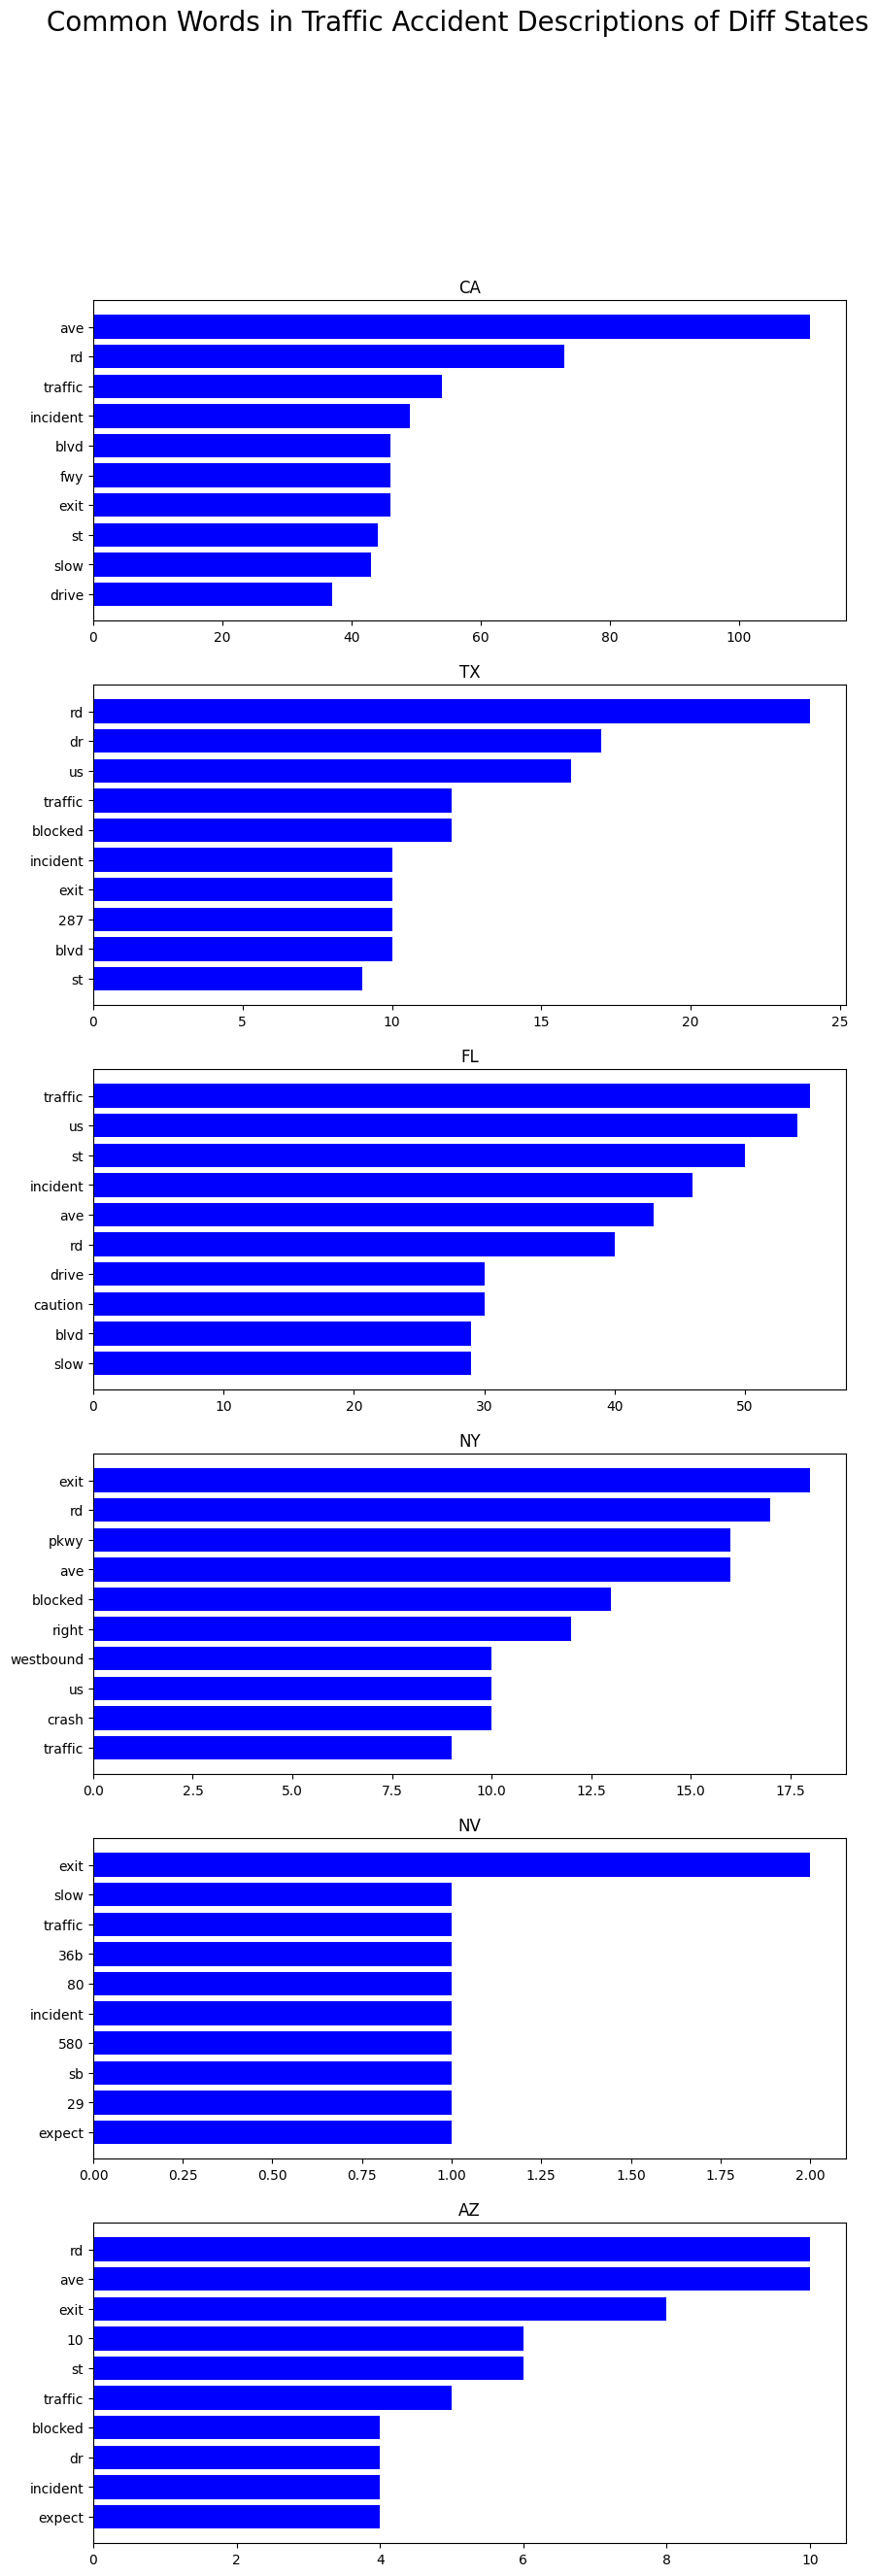

In [131]:
from collections import Counter

stop_words = set(stopwords.words('english'))

my_stop_words = {'due', 'accident', 'near', 'at', 'from', 'involved', 'on', 'the', 'and', 'a', 'to','ca', 'fl', 'ny', 'w', 'e', 'n', 'tx'}
stop_words.update(my_stop_words)

states = ['CA', 'TX', 'FL', 'NY', 'NV', 'AZ'] 

filtered_df = traffic_df[traffic_df['State'].isin(states)]


num_states = len(states)
num_cols = 1
num_rows = num_states


fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 5))
fig.suptitle('Common Words in Traffic Accident Descriptions of Diff States', fontsize=20)

for i, state in enumerate(states):
    state_df = filtered_df[filtered_df['State'] == state]
    descriptions = ' '.join(state_df['Description'].dropna()).lower()
    words = re.findall(r'\b\w+\b', descriptions)
    words = [word for word in words if word not in stop_words]
    common_words_counts = Counter(words).most_common(10)
    
    common_words = [word for word, count in common_words_counts]
    counts = [count for word, count in common_words_counts]

    ax = axs[i]
    ax.barh(common_words, counts, color='blue')
    ax.set_title(state)
    ax.invert_yaxis()

plt.show()

Next I decided to analyze common words in the traffic accident descriptions but I organized it based on different states, with those being California, Texas, Arizona, Nevada, and New York. I noticed the word exit to be really common for most of the states, indicating a lot of accidents happen on freeway exits. This is not unsurprising as exits can sometimes have sharp curves or force you to greatly slow down from the freeway speed limit which can be a factor in getting into an accident.


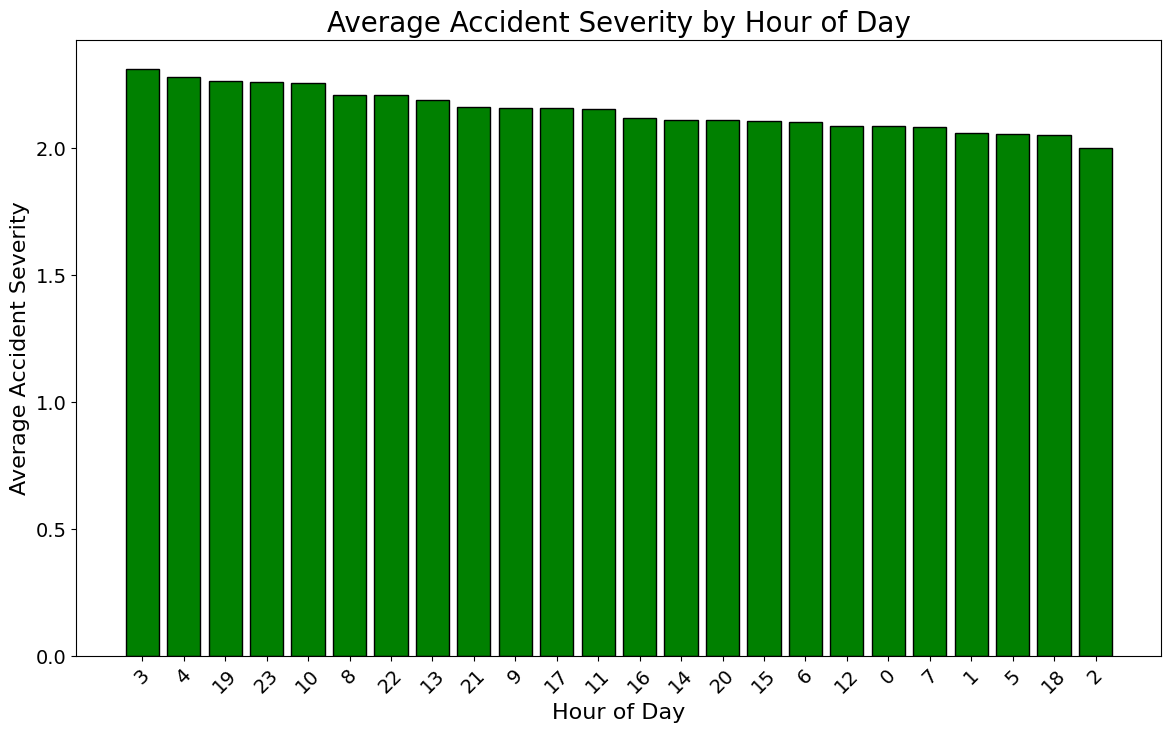

In [132]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Start_Time'])
traffic_df['Hour'] = traffic_df['Start_Time'].dt.hour

#grouping by hour and calc avg severity
avg_severity_by_hour = traffic_df.groupby('Hour')['Severity'].mean().reset_index()

avg_severity_by_hour = avg_severity_by_hour.sort_values(by='Severity', ascending=False)


plt.figure(figsize=(14, 8))
plt.bar(avg_severity_by_hour['Hour'].astype(str), avg_severity_by_hour['Severity'], color='green', edgecolor='black')
plt.xlabel('Hour of Day', fontsize=16)
plt.ylabel('Average Accident Severity', fontsize=16)
plt.title('Average Accident Severity by Hour of Day', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

For average accident severity by the hour of the day there doesn’t seem to be a huge difference although it seems the severity is worse at night, 3-4 am or around 11pm, which could be related to the fact it's dark and less cars out, so there’s a chance of speeding and lack of visibility that could add to the severity of these accidents. 

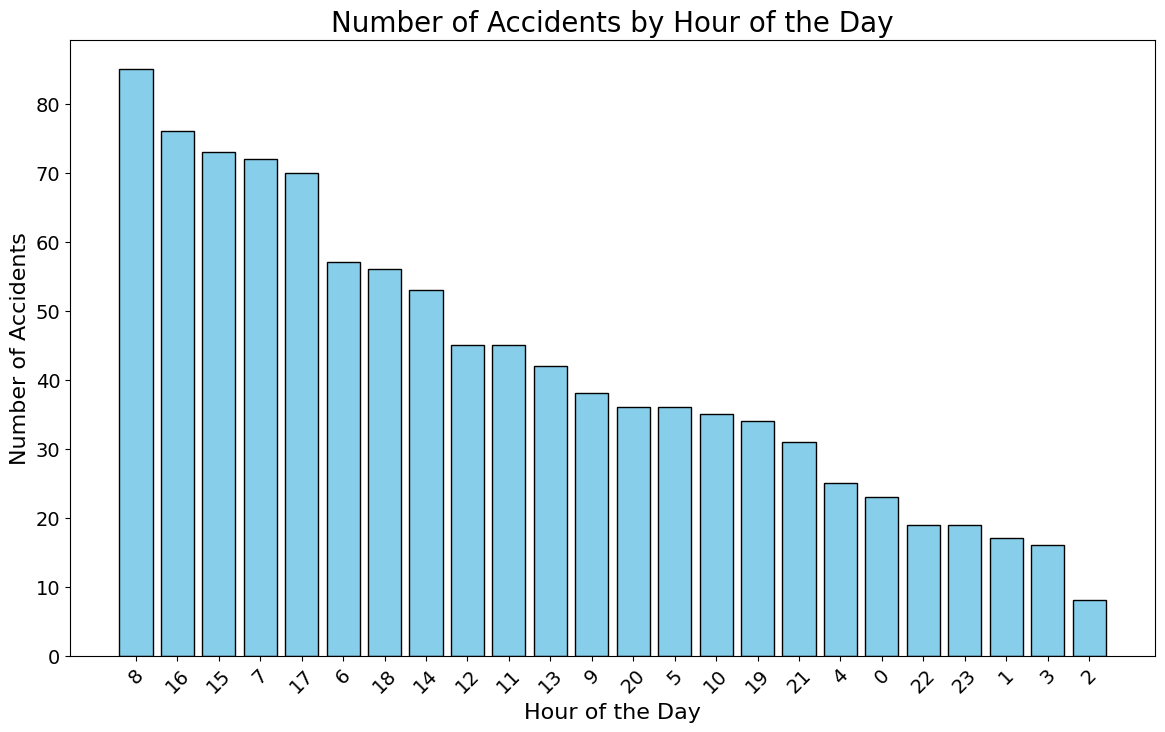

In [133]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')

# Drop rows with NaT values in 'Start_Time'
traffic_df = traffic_df.dropna(subset=['Start_Time'])

# Extract the hour from the date column
traffic_df['Hour'] = traffic_df['Start_Time'].dt.hour

# Group by hour and count the number of accidents
accidents_per_hour = traffic_df.groupby('Hour').size().reset_index(name='Number_of_Accidents')

# Sort the DataFrame by number of accidents in descending order
accidents_per_hour = accidents_per_hour.sort_values(by='Number_of_Accidents', ascending=False)

# Create the bar plot using matplotlib
plt.figure(figsize=(14, 8))
plt.bar(accidents_per_hour['Hour'].astype(str), accidents_per_hour['Number_of_Accidents'], color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents by Hour of the Day', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

However when looking at the number of accidents by hour of day 7 and 8am, and around 4pm seem to have the most accidents occurring, which could be attributed to the fact that during those times its peak commute hours and the most cars are out on the road. On the other hand 2 and 3 am have the least amount of accidents occuring; these are prime sleeping hours indicating the least amount of cars are probably on the road.


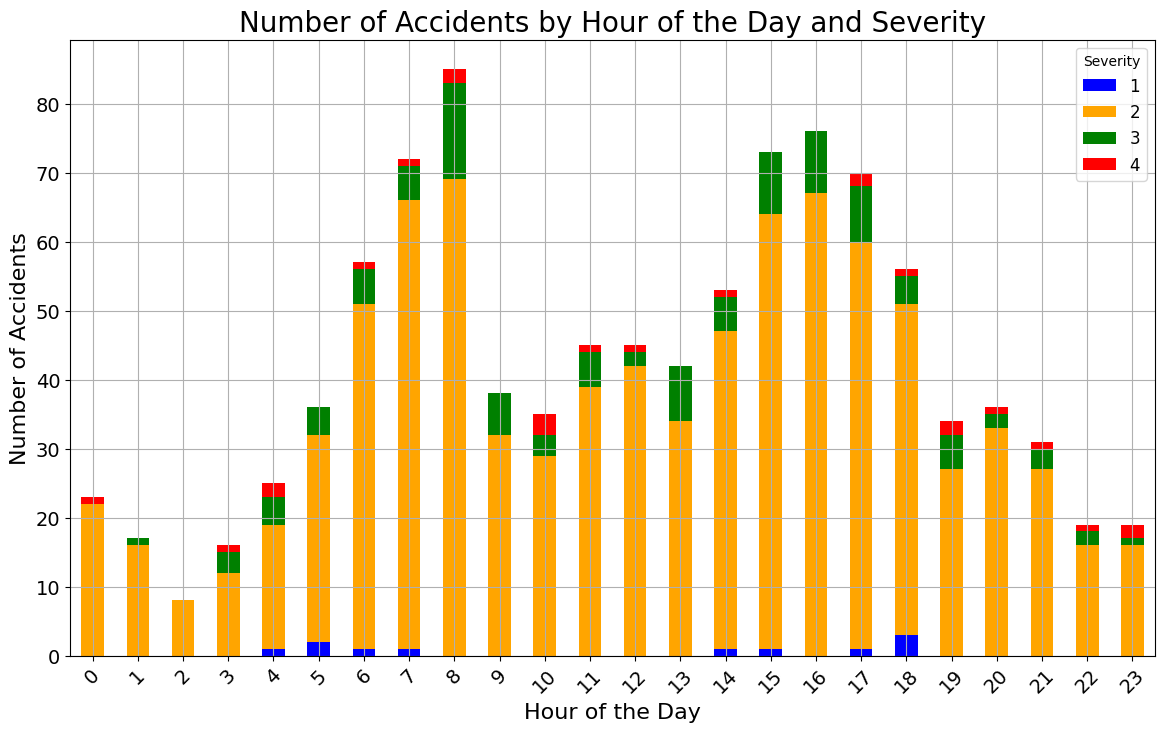

In [134]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Start_Time'])
traffic_df['Hour'] = traffic_df['Start_Time'].dt.hour

hour_severity = traffic_df.groupby(['Hour', 'Severity']).size().unstack(fill_value=0)

hour_severity.plot(kind='bar', stacked=True, figsize=(14, 8), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents by Hour of the Day and Severity', fontsize=20)
plt.legend(title='Severity', fontsize=12)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


When looking at the graph with both of these factors combined onto one plot it's easy to see that the main commuting hours like morning and early evening/later afternoon take the spot for a higher number of accidents. However when looking at severity, the percentage of severity is higher for those slightly later times. For example at 8 am around 20% of accidents fall under higher severity of 3 and 4 whereas at 7 pm closer to 25% of accidents fall under this higher severity which could be correlated to lighting factors.

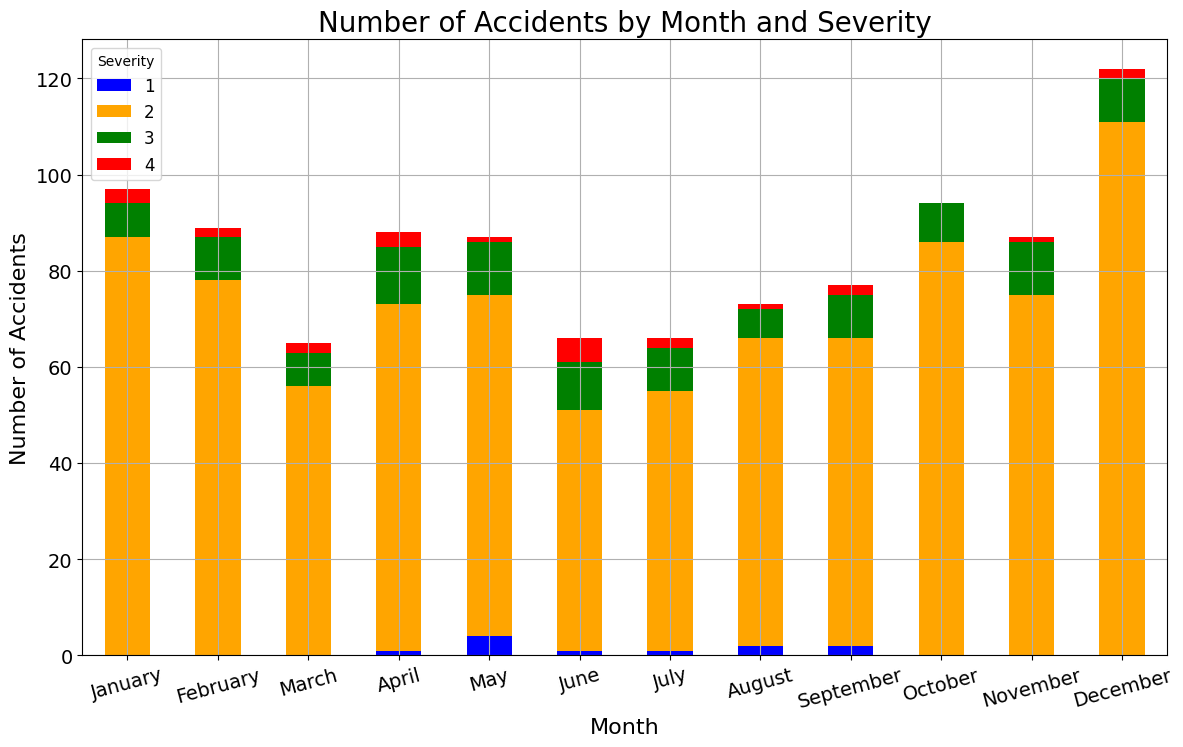

In [135]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Start_Time'])
traffic_df['Month'] = traffic_df['Start_Time'].dt.month


month_severity = traffic_df.groupby(['Month', 'Severity']).size().unstack(fill_value=0)


month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_severity.index = month_severity.index.map(month_names)

month_severity.plot(kind='bar', stacked=True, figsize=(14, 8), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.title('Number of Accidents by Month and Severity', fontsize=20)
plt.legend(title='Severity', fontsize=12)
plt.xticks(rotation=15, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

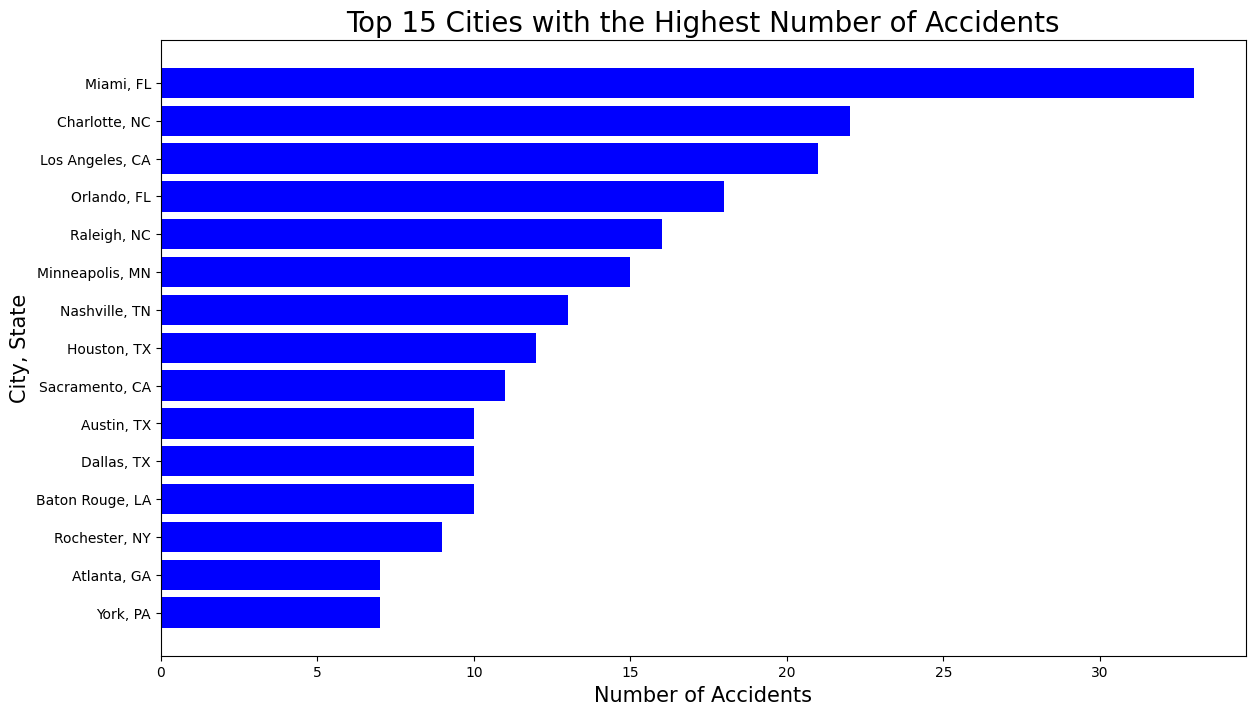

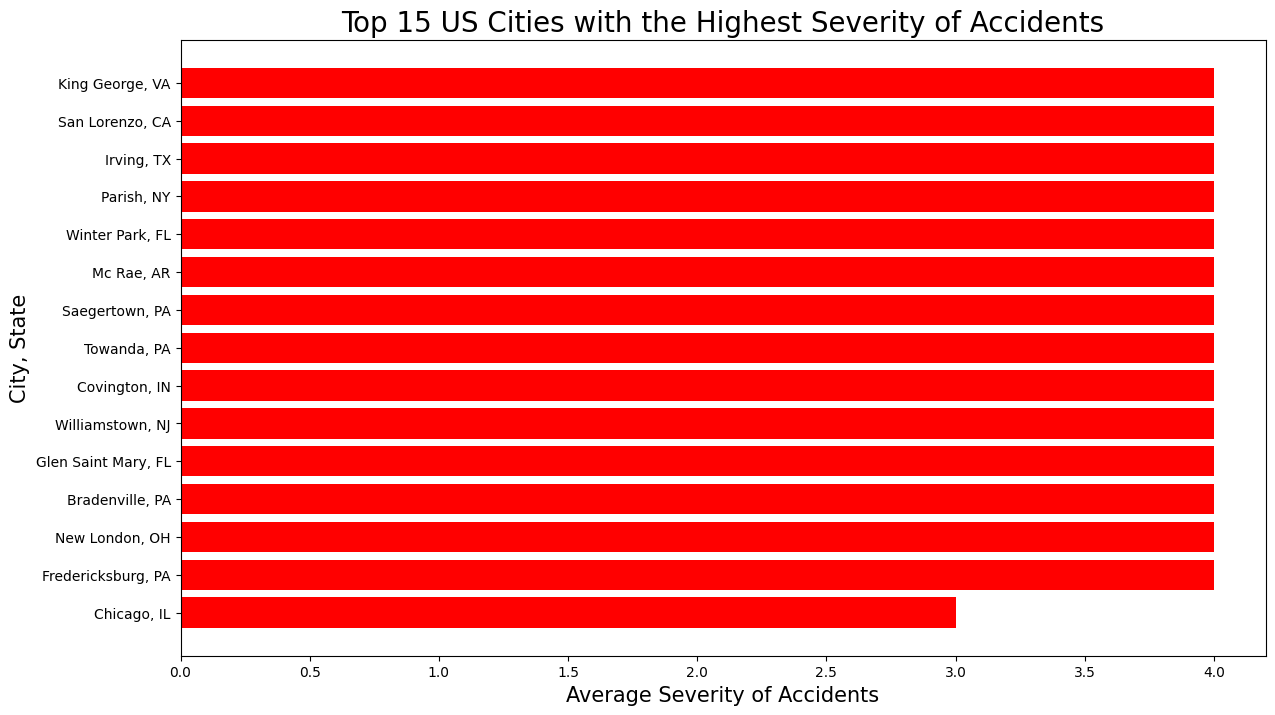

In [136]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Start_Time'])
city_state_accidents = traffic_df.groupby(['City', 'State']).size().reset_index(name='Number_of_Accidents')

city_state_severity = traffic_df.groupby(['City', 'State'])['Severity'].mean().reset_index(name='Average_Severity')
top_city_state_accidents = city_state_accidents.sort_values(by='Number_of_Accidents', ascending=False).head(15)

top_city_state_severity = city_state_severity.sort_values(by='Average_Severity', ascending=False).head(15)

#highest num of accident plot
plt.figure(figsize=(14, 8))
plt.barh(top_city_state_accidents.apply(lambda x: f"{x['City']}, {x['State']}", axis=1), 
         top_city_state_accidents['Number_of_Accidents'], color='blue')
plt.xlabel('Number of Accidents', fontsize=15)
plt.ylabel('City, State', fontsize=15)
plt.title('Top 15 Cities with the Highest Number of Accidents', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

#severity plot
plt.figure(figsize=(14, 8))
plt.barh(top_city_state_severity.apply(lambda x: f"{x['City']}, {x['State']}", axis=1), 
         top_city_state_severity['Average_Severity'], color='red')
plt.xlabel('Average Severity of Accidents', fontsize=15)
plt.ylabel('City, State', fontsize=15)
plt.title('Top 15 US Cities with the Highest Severity of Accidents', fontsize=20)
plt.gca().invert_yaxis()
plt.show()


I also decided to look at the top 15 cities with the highest number of accidents and highest severity of accidents to see if there were any connections. Miami took the top spot for highest number of accidents which was followed by LA and Charlotte. There is an ongoing stereotype that Florida has the worst drivers, which makes me wonder if overall driver compentence or driver error could potentially play a role in this stat, whether its driver distractions or driving drunk. In terms of highest severity I noticed there were many Pennsylvania cities on this, compared to any other state, which makes me wonder if there is some overarching issue in Pennsylvania whether it's their laws, infrastructure, or driver type that could be having an impact on the severity of accidents.

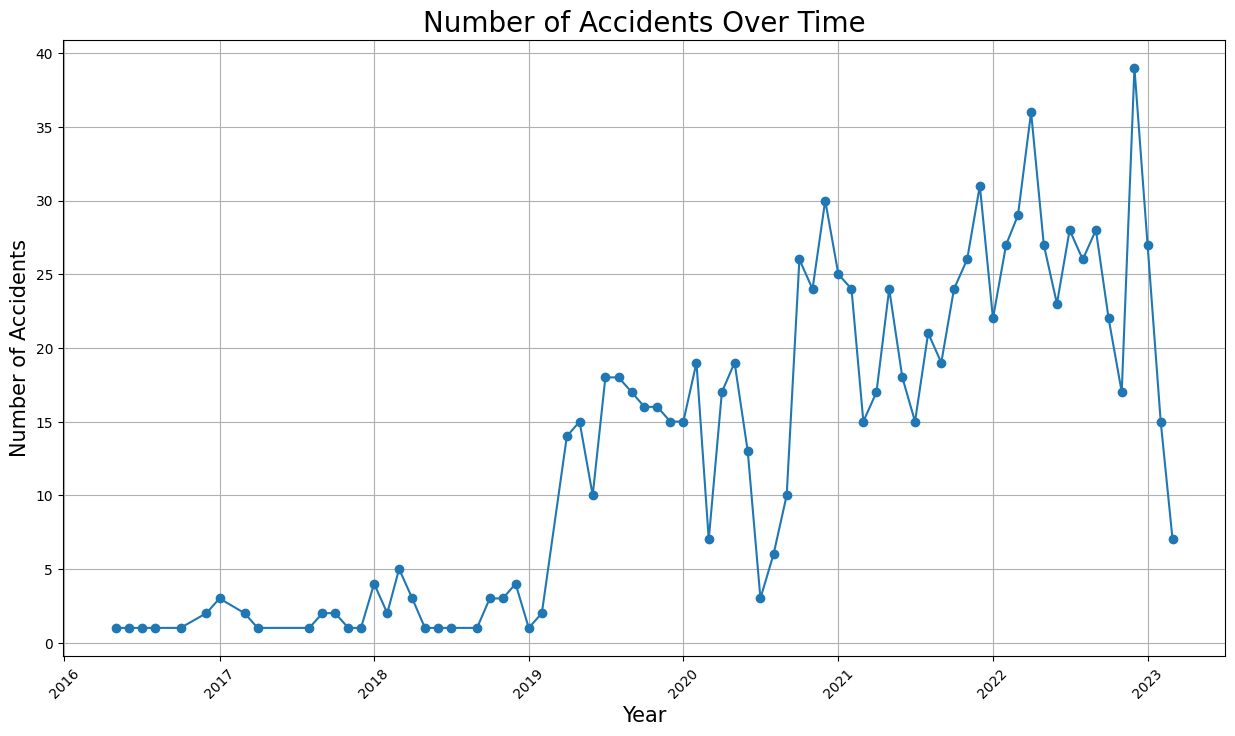

In [137]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'])
traffic_df['year'] = traffic_df['Start_Time'].dt.year
traffic_df['month'] = traffic_df['Start_Time'].dt.month


accidents_per_month = traffic_df.groupby(['year', 'month']).size().reset_index(name='number_of_accidents')
accidents_per_month['Start_Time'] = pd.to_datetime(accidents_per_month[['year', 'month']].assign(day=1))


plt.figure(figsize=(15, 8))
plt.plot(accidents_per_month['Start_Time'], accidents_per_month['number_of_accidents'], marker='o')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Accidents',fontsize=15)
plt.title('Number of Accidents Over Time', fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Looking at the accidents over time, the numbers seem pretty steady until around sometime in 2019 when the numbers seem to spike, before dropping again around early 2020, which coincides with the time of the major Covid-19 pandemic, indicating the pandemic could’ve caused a reduction in accidents for a period of time since most people were forced to stay home under lockdown restrictions. The numbers then increase by around late 2020 which could potentially be attributed to the trend of reckless driving after the pandemic due to less cars on the road, such as speeding, racing, not wearing seat belts, road rage, or driving under the influence, therefore increasing the overall number of accidents. From late 2022 to early 2023 there does seem to be a significant drop in the number of accidents. Overall there seems to be an increase in accidents compared from pre pandemic times to the post pandemic era which is interesting to see.


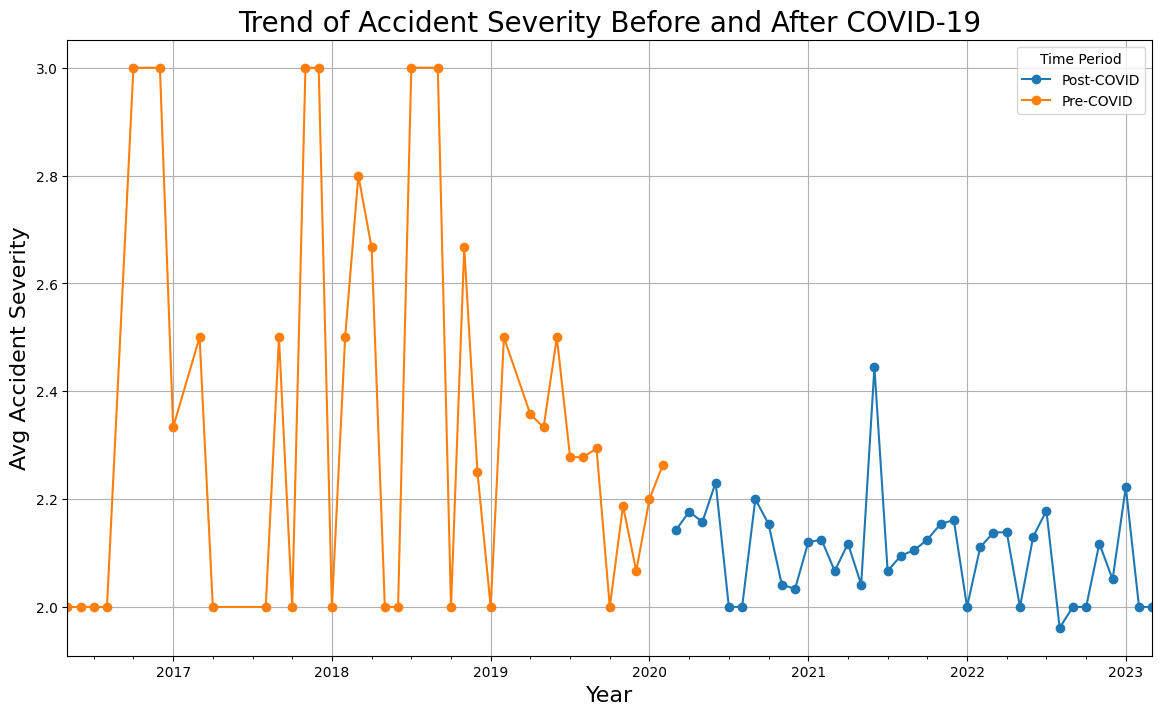

In [138]:
traffic_df['Start_Time'] = pd.to_datetime(traffic_df['Start_Time'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['Start_Time'])
traffic_df['Time Period'] = ['Pre-COVID' if date < pd.Timestamp('2020-03-01') else 'Post-COVID' for date in traffic_df['Start_Time']]


traffic_df['YearMonth'] = traffic_df['Start_Time'].dt.to_period('M')
monthly_severity = traffic_df.groupby(['YearMonth', 'Time Period'])['Severity'].mean().unstack('Time Period')


plt.figure(figsize=(14, 8))
monthly_severity.plot(kind='line', marker='o', ax=plt.gca())
plt.xlabel('Year', fontsize=16)
plt.ylabel('Avg Accident Severity', fontsize=16)
plt.title('Trend of Accident Severity Before and After COVID-19', fontsize=20)
plt.legend(title='Time Period')
plt.grid(True)
plt.show()

Comparing this to the severity of accidents before and after the start of the Covid-19 pandemic, the more severe accidents happened before the pandemic, with there being a drop in severity after March 2020. This could potentially be attributed to multiple factors. With reduced traffic and vehicles on the road, the likelihood of severe multi vehicle collisions occurring may have decreased. During the pandemic essential trips were also much more common like driving to the local grocery store, which usually involves less exposure to freeways or high speed roads lowering the chances of severe accidents. There was also increased visibility and space on the roads with fewer vehicles which allowed drivers more room to navigate and maneuver, potentially avoiding and lowering high impact crashes. Even when lockdown restrictions were over there were many people who still followed a similar routine to protect themselves from Covid, as well as the many people who have continued to work from home which could've had an impact on overall accident severity for years after.  

## Discussion

Overall this analysis has revealed different findings that offer insight into factors influencing accidents and their severity, and the changes that have happened over time. 

**Weather:** The majority of accidents happen in fair weather conditions, which is likely due to the prevalence of this weather, but also indicates that weather may not play a role in whether or not accidents are happening, it could be other factors like pontential driver errors or decisions. Other weather conditions however, like light freezing drizzle, shallow fog, and thunderstorms are associated with accidents of higher severity, suggesting that even though accidents may be more frequent in fair weather, harsher weather conditions can pose a risk for causing more severe accidents. Additionally, certain factors like higher wind speed are correlated with more severe accidents; even though fewer accidents are occurring at higher wind speeds, the ones that do happen are higher in severity.

**Location**: Through analyzing accident description, it was seen that there are recurring themes in certain places. Words like “exit” and “freeway” are more common in LA County, compared to SF and New York counties which reflect the urban structure and car centric culture in the LA area versus SF and New York counties, indicating different accident scenarios based urban layout and infrastructure.
Cities that had the highest number of accidents were Miami, LA, and Charlotte which indicate a potential need for specific interventions in these locations to prevent accidents. The cities with the highest severity of accidents include multiple cities in Pennsylvania which suggest there are maybe underlying issues or concerns whether its traffic laws, infrastructure, or driving behaviors that need to be addressed.

**Time of Day**: Number of accidents were at its peaks at times of morning and evening commutes, around 7-8am and 4-5pm, which coincides with the highest traffic volume on the roads. However in terms of severity of accidents, the percentages of higher severity accidents are higher during the night, specifically around 3-4 am and around 11 pm which could be contributed to factors like less lighting and higher speeding.

**Trends over Time and Covid-19 Impact:**
There is an overall increase in the amount of accidents from pre pandemic times to post pandemic times, which can possibly be due to reckless driving behaviors due to less crowded roads. Numbers remained pretty steady until there was a spike in 2019, which then was followed by a large drop in early 2020 potentially due to the Covid-19 lockdowns, with the numbers increasing again by late 2020. Although the number of accidents increased post covid, more severe accidents actually happened pre-pandemic, and  there is a significant drop in severity after March 2020. This could potentially be attributed to less multi vehicle collisions due to lower traffic volumes, as well as increased visibility and space on the road making it easier to avoid and prevent high impact accidents. There was also the need to only make essential trips like to the grocery store, which usually involved routes that were shorter and didn’t include high speed roads lowering the severity of accidents. Even years after, many jobs continued to stay remote, contributing to the lack of cars out on the road.


**These findings showcase the complex nature of traffic accidents and the different factors that can have an influence. By understanding this data and results, this can allow for the targeted interventions and policies to be developed to improve road safety. For example, improving exit areas could help to reduce accidents in certain locations where this is a recurring issue. Implementing stricter traffic rules and more law enforcement during these higher risk hours as well as when there is harsher weather could help to mitigate accidents. Analyzing these results over time can help in seeing what protocols or policies may have worked or not worked, and in seeing how big events like a pandemic can impact traffic accidents and what can be taken into consideration for traffic safety in the face of future major events.**
